In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import time
import json

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

sns.set_style('whitegrid')
np.random.seed(42)

In [3]:
pd. set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 0)

In [4]:
csv_path = "../../../../../../data/twint/"

In [15]:
from datetime import date, datetime, timedelta

def date_range(start_date, end_date):
    delta = end_date - start_date  # as timedelta
    days = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range(delta.days + 1)]
    return days # YYYY-MM-DD


In [16]:
ticker = "AAPL,MSFT,AMZN,FB,GOOG,GOOGL,TSLA,NVDA,PYPL,ASML,INTC,CMCSA,NFLX,ADBE,CSCO,PEP,AVGO,TXN,TMUS"

In [17]:
p = pathlib.Path.cwd().glob("../../../../../../data/twint/*.csv")
files = [x for x in p if x.is_file()]

files.sort()  # sort the files by year

In [18]:
files

[PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2010.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2011.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2012.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2013.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2014.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/AAPL_twint_2015.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../

In [20]:
all_dfs = []

for f in files:

    _df = pd.read_csv(f, lineterminator='\n')

    all_dfs.append(_df)

    # start_date = date(int(f.stem), 1, 1)
    # end_date = date(int(f.stem), 12, 31)

    # if int(f.stem) == 2022:
    #     end_date = date(int(f.stem), 3, 4)

    # date_list = date_range(start_date, end_date)
    # print(start_date)
    
    # # Opening JSON file
    # with open(f) as json_file:
    #     data = json.load(json_file)
    #     for i in date_list:
    #         df_x = pd.DataFrame(data[i])
    #         df_x["date"] = datetime.strptime(i, "%Y-%m-%d")
    #         all_dfs.append(df_x)

In [21]:
df_combined = pd.concat(all_dfs)

In [22]:
df_combined.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,7273036289,7273036289,1.262365e+12,2010-01-01,0,NaN,Apple 2.0: Tablet: Big iPhone or thin MacBook?...,en,[],['aapl'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,7382848163,7382848163,1.262647e+12,2010-01-04,0,NaN,"Apple 2.0: Apple tablet to ship in March, sour...",en,[],['aapl'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,7380526126,7380526126,1.262643e+12,2010-01-04,0,NaN,"Apple Tablet Will Be 10-11 Inches, Ships In Ma...",en,[],['aapl'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,7377981409,7377981409,1.262637e+12,2010-01-04,0,NaN,CHART OF THE DAY: Android Taking Wind Out Of i...,en,[],"['goog', 'aapl', 'rimm']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,7350195565,7350195565,1.262568e+12,2010-01-04,0,NaN,Apple 2.0: How many iPhones did Apple sell? h...,en,[],['aapl'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [23]:
df_combined = df_combined.set_index("id")

In [26]:
df_combined.index.is_unique

True

In [28]:
df_combined.shape

(41056, 37)

In [30]:
df_aapl_groupedby_date = df_combined.groupby('date').count()
df_aapl_groupedby_date.reset_index(inplace=True)
df_aapl_groupedby_date.set_index("date", inplace=True)
df_aapl_groupedby_date = df_aapl_groupedby_date[["search"]]

In [31]:
df_aapl_groupedby_date.describe()

,search
count,4175.000000
mean,9.833772
std,8.716240
min,1.000000
25%,4.000000
50%,7.000000
75%,14.000000
max,96.000000


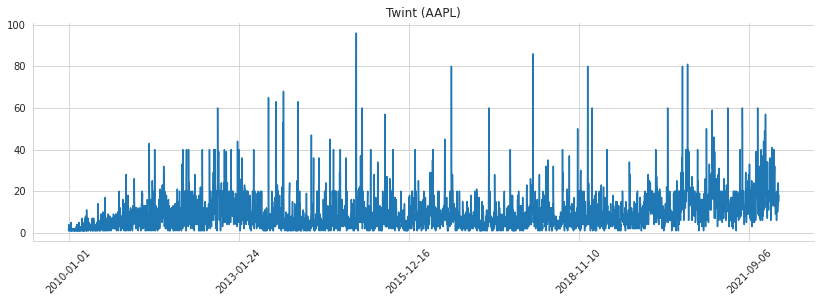

In [35]:
ax = df_aapl_groupedby_date["search"].plot(title='Twint (AAPL)',
           legend=False,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

In [5]:
# df_combined.to_csv("../../../../../../data/twint/AAPL_20100101_to_20220304.csv")
df = pd.read_csv("../../../../../../data/twint/AAPL_20100101_to_20220304.csv", low_memory=False, index_col="id", lineterminator='\n')

In [10]:
df.shape

(41056, 37)

In [9]:
df.index.is_unique

True